# HW3_2_df1676

### Data: Citi Bike

### Outline:
1. IDEA
* Hypothesis: H<sub>0</sub>,H<sub>1</sub> and Significant Level $\alpha$ 	
* Data Pre-processing
* Plot
* Hypothesis Test
* Conclusion and Interpretation 

#### Group: Dongjie Fan, Ziman zhou

<br/><br/><br/>

## 1.IDEA

Young people are more likely to use citi bikes to commute on weekends than middle-age people.
<br/>
<br/>__*Notes*__:
<br/>Young: 18 <= age < 40
<br/>Middle-age: 40 <= age <= 60
<br/><br/>weekends: Sat and Sun
<br/>week days: Mon to Sun

## 2.Hypoythesis

### NULL HYPOTHESIS: H<sub>0<sub/>
The ratio of young people taking Citi-Bikes on weekends to  taking on week days is the same or lower than the ratio of middle-aged people taking Citi-Bikes on weekends to taking on week days.

$$ H_{0}:  \frac{\# \,of\,YOUNG\, on\, weekends}{\#\,of\,YOUNG\, on \,week \,days} <= \frac{\# \,of\,MIDDLE\,AGE\, on\, weekends}{\#\,of\,MIDDLE\,AGE\, on \,week \,days}$$

### ALTERNATIVE HYPOTHESIS: H<sub>1<sub/>

The ratio of young people taking Citi-Bikes on weekends to  taking on week days is higher than the ratio of middle-aged people taking Citi-Bikes on weekends to taking on week days.

$$ H_{1}:  \frac{\# \,of\,YOUNG\, on\, weekends}{\#\,of\,YOUNG\, on \,week \,days} > \frac{\# \,of\,MIDDLE\,AGE\, on\, weekends}{\#\,of\,MIDDLE\,AGE\, on \,week \,days}$$

### Significant Level: $\alpha=0.05$ 

## 3. Data

In [4]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
os.getenv("PUIDATA")

'/home/cusp/df1676/PUIdata'

In [9]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isdir(os.getenv("PUIDATA")):
        os.system('mkdir '+ os.getenv("PUIDATA"))

    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
        os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
        os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
        os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
        os.system("rm " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
        if int(datestring) < 201409:
            os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
        if int(datestring) < 201307:
            print ("Warning: Not Avaliable")

### Data Before 201307 is not avaliable !!!

In [10]:
datestring = raw_input("Input Year and Month (eg. 201510): ")
#datestring = '201409'
getCitiBikeCSV(datestring)

Input Year and Month (eg. 201510): 201502


In [11]:
df = pd.read_csv(datestring + '-citibike-tripdata.csv')
df['age'] = pd.Series(np.repeat(2016,df.shape[0]))-df['birth year']
df['young_or_not'] = pd.Series(np.repeat(0,df.shape[0]))
df = df[(df.age >= 18) & (df.age <= 60)]
df['date'] = pd.to_datetime(df['starttime'])
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,young_or_not,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,38.0,0,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,23.0,0,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,47.0,0,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,31.0,0,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,59.0,0,2015-02-01 00:01:00


In [12]:
df2=df.loc[: , ("date", "age", "young_or_not")]
df2['young_or_not']= df2.age < 40
df2['young_or_not']= df2['young_or_not'].astype(int)
df2.head(5)

,date,age,young_or_not
0,2015-02-01 00:00:00,38.0,1
1,2015-02-01 00:00:00,23.0,1
2,2015-02-01 00:01:00,47.0,0
3,2015-02-01 00:01:00,31.0,1
4,2015-02-01 00:01:00,59.0,0


## Plot

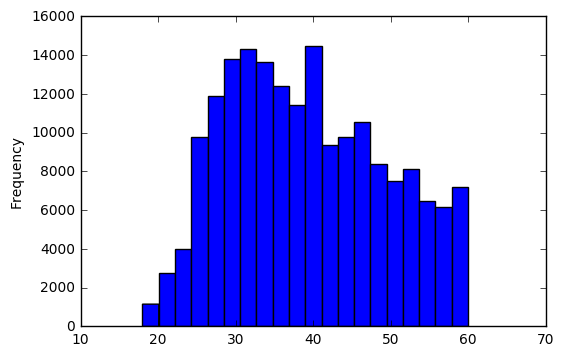

In [13]:
df['age'].plot(kind="hist", bins=20)

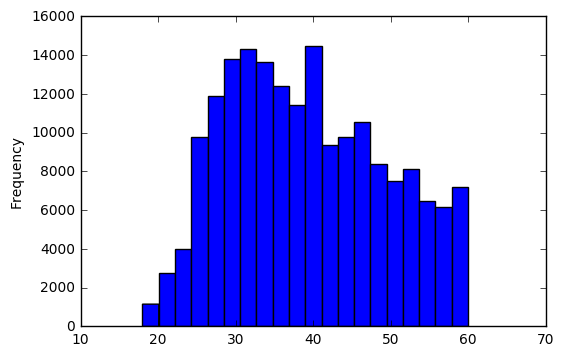

In [14]:
df2['age'].plot(kind='hist', bins=20)

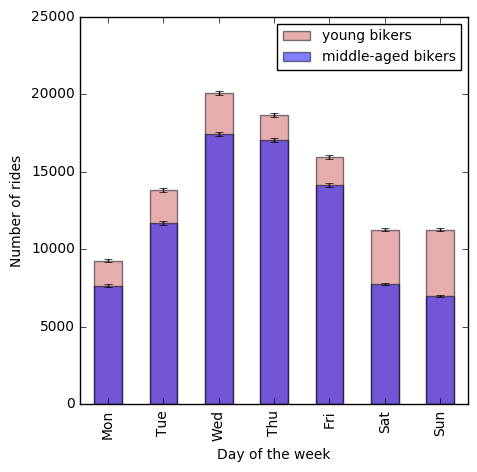

In [38]:
fig=pl.figure(figsize(5,5))

norm_y = 1
error_y = np.sqrt(counts_y)
counts_y = df2['date'][df2['young_or_not'] == 1].groupby([df2['date'].dt.weekday]).count()
(counts_y / norm_w).plot(kind="bar",color='IndianRed', alpha=0.5, yerr=[
            ((error_y) / norm_y, (error_y) / norm_y)], label='young bikers')
#Notes:
#Note: the counts have errors of course. 
#what is the error on the count statistics? 
#for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic
            
norm_m = 1
error_m = np.sqrt(counts_m)
counts_m = df2['date'][df2['young_or_not'] == 0].groupby([df2['date'].dt.weekday]).count()
ax = (counts_m / norm_m).plot(kind="bar", alpha=0.5, yerr=[
            ((error_m) / norm_m, (error_m) / norm_m)], label='middle-aged bikers')
tmp = ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)

ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['young bikers','middle-aged bikers'],fontsize=10)

## Fig 1: Distribution of Citibike bikers by age ( young V.S. middle-aged ) in Feb 2015 ( absolute counts)

<br/><br/>


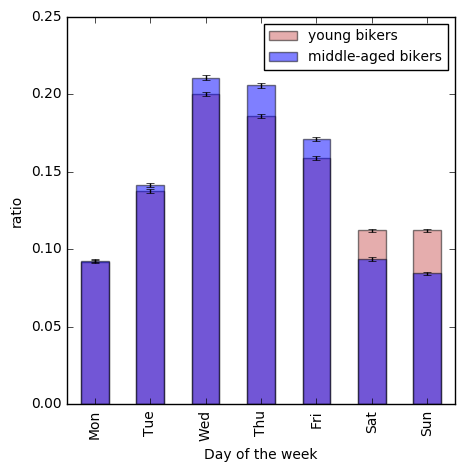

In [56]:
#Note: These are absolute numbers. 
#It is very hard to compare absolute numbers.
#Ratios (or proportions) are more ameable to comparison, 
#so let's normalize the distribution of man, and that of women 
#(i.e. devide them by the total number of rides for that gender. 
#Notice that i have to normalize the errorbars too!)

fig=pl.figure(figsize(5,5))

norm_y = counts_y.sum()
error_y = np.sqrt(counts_y)
counts_y = df2['date'][df2['young_or_not'] == 1].groupby([df2['date'].dt.weekday]).count()
ax2=(counts_y / norm_y).plot(kind="bar",color='IndianRed', alpha=0.5, yerr=[
            ((error_y) / norm_y, (error_y) / norm_y)], label='young bikers')
#Notes:
#Note: the counts have errors of course. 
#what is the error on the count statistics? 
#for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic
            
norm_m = counts_m.sum()
error_m = np.sqrt(counts_m)
counts_m = df2['date'][df2['young_or_not'] == 0].groupby([df2['date'].dt.weekday]).count()
ax2 = (counts_m / norm_m).plot(kind="bar", alpha=0.5, yerr=[
            ((error_m) / norm_m, (error_m) / norm_m)], label='middle-aged bikers')
tmp = ax2.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)

ax2.set_ylabel ("ratio")
ax2.set_xlabel ("Day of the week")
pl.legend(['young bikers','middle-aged bikers'],fontsize=10)

## Fig2: Distribution of Citibike bikers by age ( young V.S. middle-aged ) in Feb 2015 (relative ratio)

<br/><br/>

# Hypothesis Test

Young: week(7 days):1.000, weekend:0.225, week(7 days) error:0.003, weekend error:0.001
Middle-aged: week(7 days):0.822, weekend:0.178, week(7 days) error:0.003, weekend error:0.001


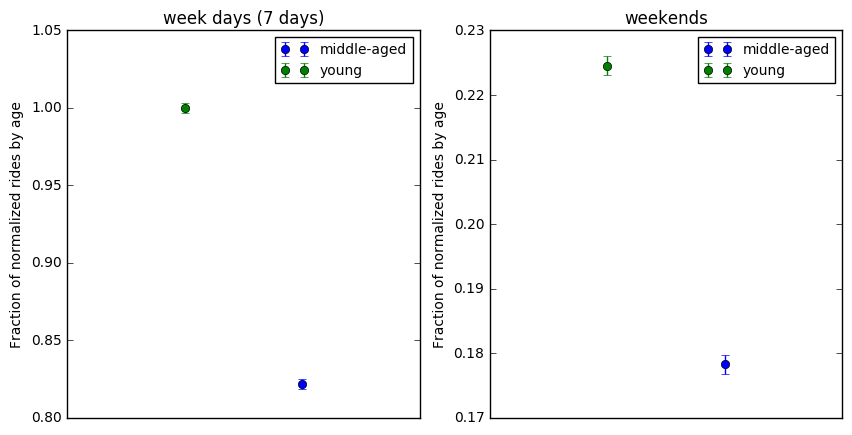

In [69]:
fig = pl.figure(figsize(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

week_y = sum(counts_y[:]) * 1.0 / norm_y
weekend_y = sum(counts_y[-2:]) * 1.0 / norm_y
eweek_y = np.sqrt(sum(error_y[:]**2)) / norm_y
eweekend_y = np.sqrt(sum(error_y[-2:]**2)) / norm_y

week_m = sum(counts_m[:-2]) * 1.0 / norm_m
weekend_m = sum(counts_m[-2:]) * 1.0 / norm_m
eweek_m = np.sqrt(sum(error_m[:-2]**2)) / norm_m
eweekend_m = np.sqrt(sum(error_m[-2:]**2)) / norm_m

print("Young: week(7 days):{0:.3f}, weekend:{1:.3f}, week(7 days) error:{2:.3f}, weekend error:{3:.3f}".format(
        week_y, weekend_y, eweek_y, eweekend_y))
print("Middle-aged: week(7 days):{0:.3f}, weekend:{1:.3f}, week(7 days) error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_m, weekend_m, eweek_m, eweekend_m))

ax1.errorbar([0.4], [week_m], yerr=[eweek_m], fmt='o', label='middle-aged')
ax1.errorbar([0.2], [week_y], yerr=[eweek_y], fmt='o', label='young')
ax1.set_xlim(0, 0.6)
ax2.errorbar([0.4], [weekend_m], yerr=[eweekend_m], fmt='o', label='middle-aged')
ax2.errorbar([0.2], [weekend_y], yerr=[eweekend_y], fmt='o', label='young')
ax2.set_xlim(0, 0.6)

ax1.set_title("week days (7 days)")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by age")
ax1.set_ylabel("Fraction of normalized rides by age")

#pl.xlim(-0.5, 1.5)
ax1.legend(fontsize = 10)
ax2.legend(fontsize = 10)